<a href="https://colab.research.google.com/github/Guhan2348519/QC_LAB/blob/main/2348519_QC_LAB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
!pip install qiskit

In [24]:
import qiskit
from qiskit.quantum_info import Operator
from qiskit.quantum_info import Statevector
import numpy as np
import math


In [25]:
X=Operator([[0,1],[1,0]])
Y=Operator([[0,-1j],[1j,0]])
Z=Operator([[1,0],[0,-1]])
H=Operator([[1/math.sqrt(2),1/math.sqrt(2)],[1/math.sqrt(2),-1/math.sqrt(2)]])
S=Operator([[1,0],[0,1j]])
T=Operator([[1,0],[0,math.e**(math.pi*1j/4)]])
v=Statevector([1,0])
display(v.draw("text"))
display(v.draw("latex"))


[1.+0.j,0.+0.j]

<IPython.core.display.Latex object>

In [26]:
v=v.evolve(H)
v=v.evolve(T)
v=v.evolve(H)
v=v.evolve(T)
v=v.evolve(Z)
display(v.draw("text"))
display(v.draw("latex"))


[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

<IPython.core.display.Latex object>

In [27]:
from qiskit import QuantumCircuit
from qiskit.visualization import circuit_drawer

circuit = QuantumCircuit(1)
circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)
diagram = circuit.draw(output='text')
print(diagram)


   ┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ T ├┤ H ├┤ T ├┤ Z ├
   └───┘└───┘└───┘└───┘└───┘


In [28]:
ket0=Statevector([1,0])
v=ket0.evolve(H)
v.draw("text")

[0.70710678+0.j,0.70710678+0.j]

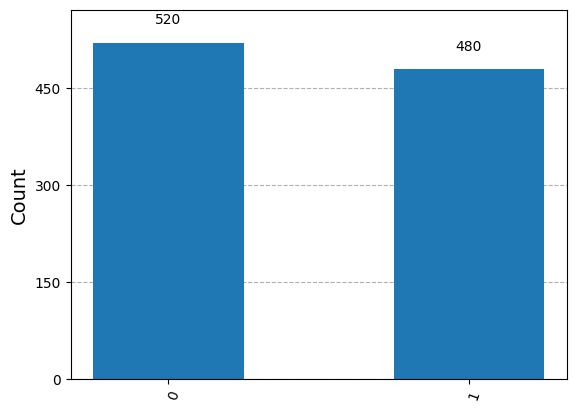

In [29]:
from qiskit.visualization import plot_histogram
statistics=v.sample_counts(1000)
plot_histogram(statistics)

In [30]:
H=Operator([[1/math.sqrt(2),1/math.sqrt(2)],[1/math.sqrt(2),-1/math.sqrt(2)]])
S=Operator([[1,0],[0,1j]])


In [41]:
!pip install qiskit_aer

In [42]:
!pip install pylatexenc

┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐ ░ ┌─┐
     q: ┤ H ├┤ X ├┤ S ├┤ H ├┤ H ├┤ X ├┤ S ├┤ H ├─░─┤M├
        └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ░ └╥┘
meas: 1/════════════════════════════════════════════╩═
                                                    0

{'0': 100}


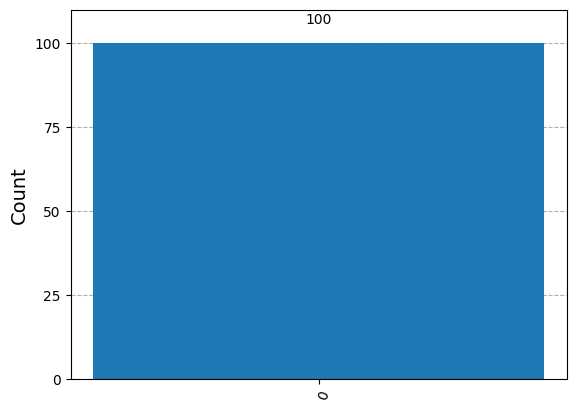

In [44]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

def R_gate(qc, qubit):
    qc.h(qubit)
    qc.x(qubit)
    qc.s(qubit)
    qc.h(qubit)

# Create a quantum circuit
qc = QuantumCircuit(1)

# Apply R twice
R_gate(qc, 0)
R_gate(qc, 0)

# Measure the qubit
qc.measure_all()


display(qc.draw(output='text'))
# Simulate the circuit
simulator = AerSimulator()
job = simulator.run(qc, shots=100)
result = job.result()
counts = result.get_counts(qc)
print(counts)

display(plot_histogram(counts))




in the above code we can see that applying the R_gate twice results in flipping the state of the qubit, effectively implementing a NOT gate. If you start with the qubit in state |0⟩, applying R twice yields |1⟩ and vice-versa. This confirms that R is the square root of NOT. The visualization will show the sequence of H, X, S, and H gates applied twice.